In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv

In [12]:
sim=[]

for i in range(1200):
    sim.append(pd.read_csv(f'data_local/sim2/job_{i}.txt', sep="\t",encoding='iso-8859-1', on_bad_lines='skip',engine='python'))
    

In [13]:
sim[0].head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0


In [16]:
lichtAn = pd.read_csv('data_local/TheoCanLightDark_lon.txt', sep='\t')
lichtAus = pd.read_csv('data_local/TheoCanLightDark_loff.txt', sep='\t')

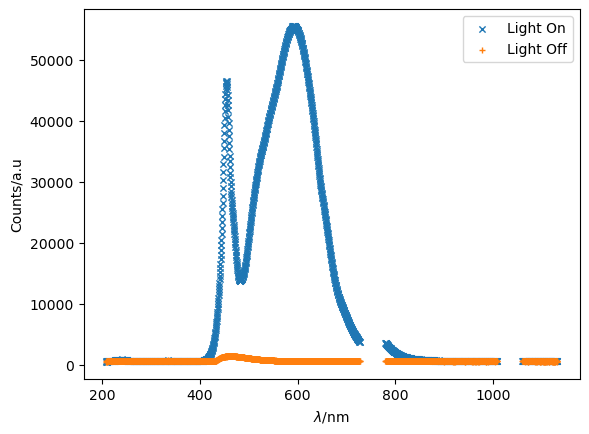

In [42]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

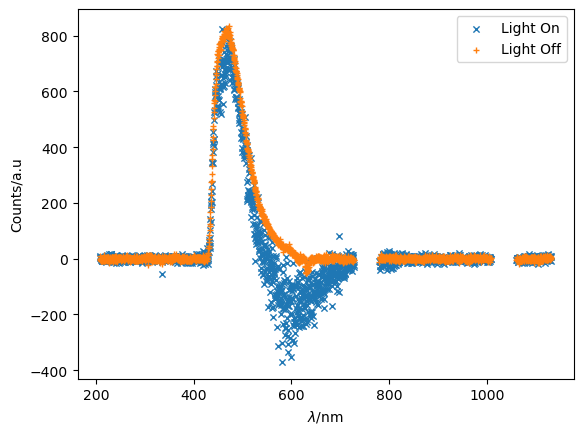

In [44]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]]-lichtAn[lichtAn.columns[1]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]]-lichtAus[lichtAus.columns[1]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

In [83]:
np.linspace(-6,31.8,15), np.linspace(-18,26.8,15)

(array([-6. , -3.3, -0.6,  2.1,  4.8,  7.5, 10.2, 12.9, 15.6, 18.3, 21. ,
        23.7, 26.4, 29.1, 31.8]),
 array([-18. , -14.8, -11.6,  -8.4,  -5.2,  -2. ,   1.2,   4.4,   7.6,
         10.8,  14. ,  17.2,  20.4,  23.6,  26.8]))

In [74]:
radial = np.empty((9,15))
for i in np.linspace(-18,26.8,15):
    for j in np.linspace(-6,31.8,15):
        radial[0].append()

SyntaxError: expected ':' (3673021478.py, line 3)

In [70]:
angleC = []
angleDC = []
for i in range(44):
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}.5deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}deg_v=0deg.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}.5deg_v=0deg.txt', sep='\t'))